 ## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 

## Data Preprocessing

### Training Image Preprocessing

In [2]:
## link: keras.io/api/data_loading/image/
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical", #we are use categorical here because of here we are dealing with more than two class problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation image preprocessing


In [3]:
## link: keras.io/api/data_loading/image/
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 90.5  126.5   65.5 ]
   [ 91.25 127.25  66.25]
   [100.25 136.25  75.25]
   ...
   [ 80.75 109.    67.25]
   [ 69.75  98.75  54.25]
   [ 58.    87.    41.  ]]

  [[ 97.75 133.75  72.75]
   [ 85.   121.    60.  ]
   [100.25 136.25  75.25]
   ...
   [ 73.   104.25  60.  ]
   [ 64.75  96.5   49.75]
   [ 67.75  99.75  51.  ]]

  [[102.75 138.75  77.75]
   [ 83.5  119.5   58.5 ]
   [ 99.   135.    74.  ]
   ...
   [ 79.   110.75  64.  ]
   [ 71.75 104.    53.5 ]
   [ 72.75 105.5   52.75]]

  ...

  [[ 31.5   65.5   48.5 ]
   [ 32.    66.    49.  ]
   [ 33.    67.    50.  ]
   ...
   [ 58.5   90.5   51.5 ]
   [ 67.75  99.75  60.75]
   [ 65.25  97.25  58.25]]

  [[ 31.5   65.5   48.5 ]
   [ 32.    66.    49.  ]
   [ 33.    67.    50.  ]
   ...
   [ 55.25  87.25  48.25]
   [ 57.5   89.5   50.5 ]
   [ 69.75 101.75  62.75]]

  [[ 31.5   65.5   48.5 ]
   [ 32.    66.    49.  ]
   [ 33.    67.    50.  ]
   ...
   [ 57.25  89.25  50.25]
   [ 57.75  89.75  50.75]
   [ 65.5   97.5   5

### To avoid Overshooting
1. Choose small learning rate, default 0.001 we are taking 0.0001
2. There may be chance of Underfitting. So increase Number of neurons
3. Add more Convolution layer to extract more feature from images. There may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature. So feed with more feature

## Building model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [7]:
model=Sequential()

In [8]:
## Building convolutional Layer

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) ## To Avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
## output layer
# here 38 different class problem so we are neend to here 38 different outputs
# softmax neuron gives the probability of each class in each neurons
model.add(Dense(units=38,activation='softmax' ))

## Compiling the Model

In [19]:
## here we are dicrease the learning rate becase of minimize the loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [21]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3251s 1s/step - accuracy: 0.4226 - loss: 2.0275 - val_accuracy: 0.8546 - val_loss: 0.4577
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2614s 1s/step - accuracy: 0.8468 - loss: 0.4861 - val_accuracy: 0.9288 - val_loss: 0.2196
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2693s 1s/step - accuracy: 0.9125 - loss: 0.2668 - val_accuracy: 0.9005 - val_loss: 0.3092
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1717s 781ms/step - accuracy: 0.9372 - loss: 0.1933 - val_accuracy: 0.9462 - val_loss: 0.1660
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1582s 720ms/step - accuracy: 0.9572 - loss: 0.1329 - val_accuracy: 0.9549 - val_loss: 0.1342
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1654s 753ms/step - accuracy: 0.9637 - loss: 0.1101 - val_accuracy: 0.9494 - val_loss: 0.1705
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2757s 1s/step - accuracy: 0.9713 - loss: 0.0900 - val_accuracy: 0.9602 - val_loss: 0.1344
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1656s 753ms/step - accura

### Model evaluation

In [22]:
## Model Evaluation on Training set
train_loss,train_acc=model.evaluate(training_set)

print(train_loss,train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 404s 184ms/step - accuracy: 0.9906 - loss: 0.0300
0.02517707273364067 0.9922043085098267


In [23]:
## Model on validation set
val_loss,val_acc=model.evaluate(validation_set)

print(val_loss,val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 88s 160ms/step - accuracy: 0.9706 - loss: 0.0976
0.09890864044427872 0.9717732667922974


## Saving Model

In [24]:
model.save("Trained_model.h5")

In [25]:
model.save("Trained_model.keras")

In [26]:
training_history.history

{'accuracy': [0.6217227578163147,
  0.8675723671913147,
  0.9194394946098328,
  0.9425990581512451,
  0.9587026238441467,
  0.9668682217597961,
  0.9731417894363403,
  0.977978527545929,
  0.9804680347442627,
  0.9823173880577087],
 'loss': [1.2767696380615234,
  0.41744914650917053,
  0.2466302216053009,
  0.17437401413917542,
  0.12603917717933655,
  0.10085136443376541,
  0.08440201729536057,
  0.0690271332859993,
  0.06057991087436676,
  0.05463632196187973],
 'val_accuracy': [0.8545982241630554,
  0.9288071990013123,
  0.9005235433578491,
  0.9462212324142456,
  0.954871416091919,
  0.9493512511253357,
  0.9601638913154602,
  0.9671636819839478,
  0.9642044305801392,
  0.9717732667922974],
 'val_loss': [0.45769867300987244,
  0.21959194540977478,
  0.3092385530471802,
  0.16602952778339386,
  0.13417549431324005,
  0.17051081359386444,
  0.13441553711891174,
  0.10562014579772949,
  0.12459170818328857,
  0.09890861064195633]}

In [27]:
## Recording history in json Formate
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [28]:
training_history.history['accuracy']

[0.6217227578163147,
 0.8675723671913147,
 0.9194394946098328,
 0.9425990581512451,
 0.9587026238441467,
 0.9668682217597961,
 0.9731417894363403,
 0.977978527545929,
 0.9804680347442627,
 0.9823173880577087]

In [29]:
training_history.history['val_accuracy']

[0.8545982241630554,
 0.9288071990013123,
 0.9005235433578491,
 0.9462212324142456,
 0.954871416091919,
 0.9493512511253357,
 0.9601638913154602,
 0.9671636819839478,
 0.9642044305801392,
 0.9717732667922974]

### Accuracy Visualization

In [30]:
epochs=[i for i in range(1,11)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

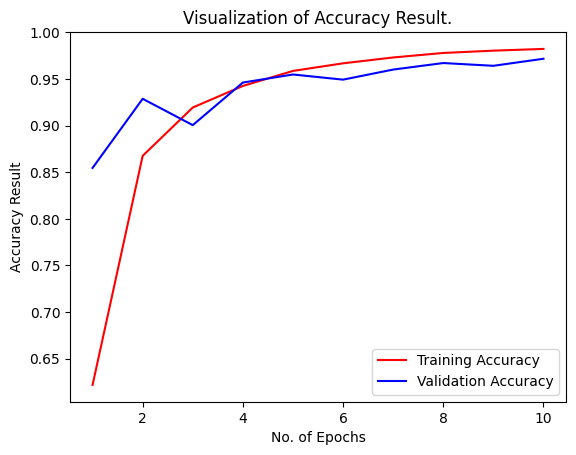

In [31]:
plt.plot(epochs,training_history.history['accuracy'],color='Red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result.")
plt.legend()
plt.show()

### some other metrics for model evaluation

In [32]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 300s 17ms/step


In [37]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [38]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [41]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.99      0.96       504
                                 Apple___Black_rot       1.00      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.90      0.99      0.94       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.94      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.94      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.96      0.

## Confusion matrix visualization

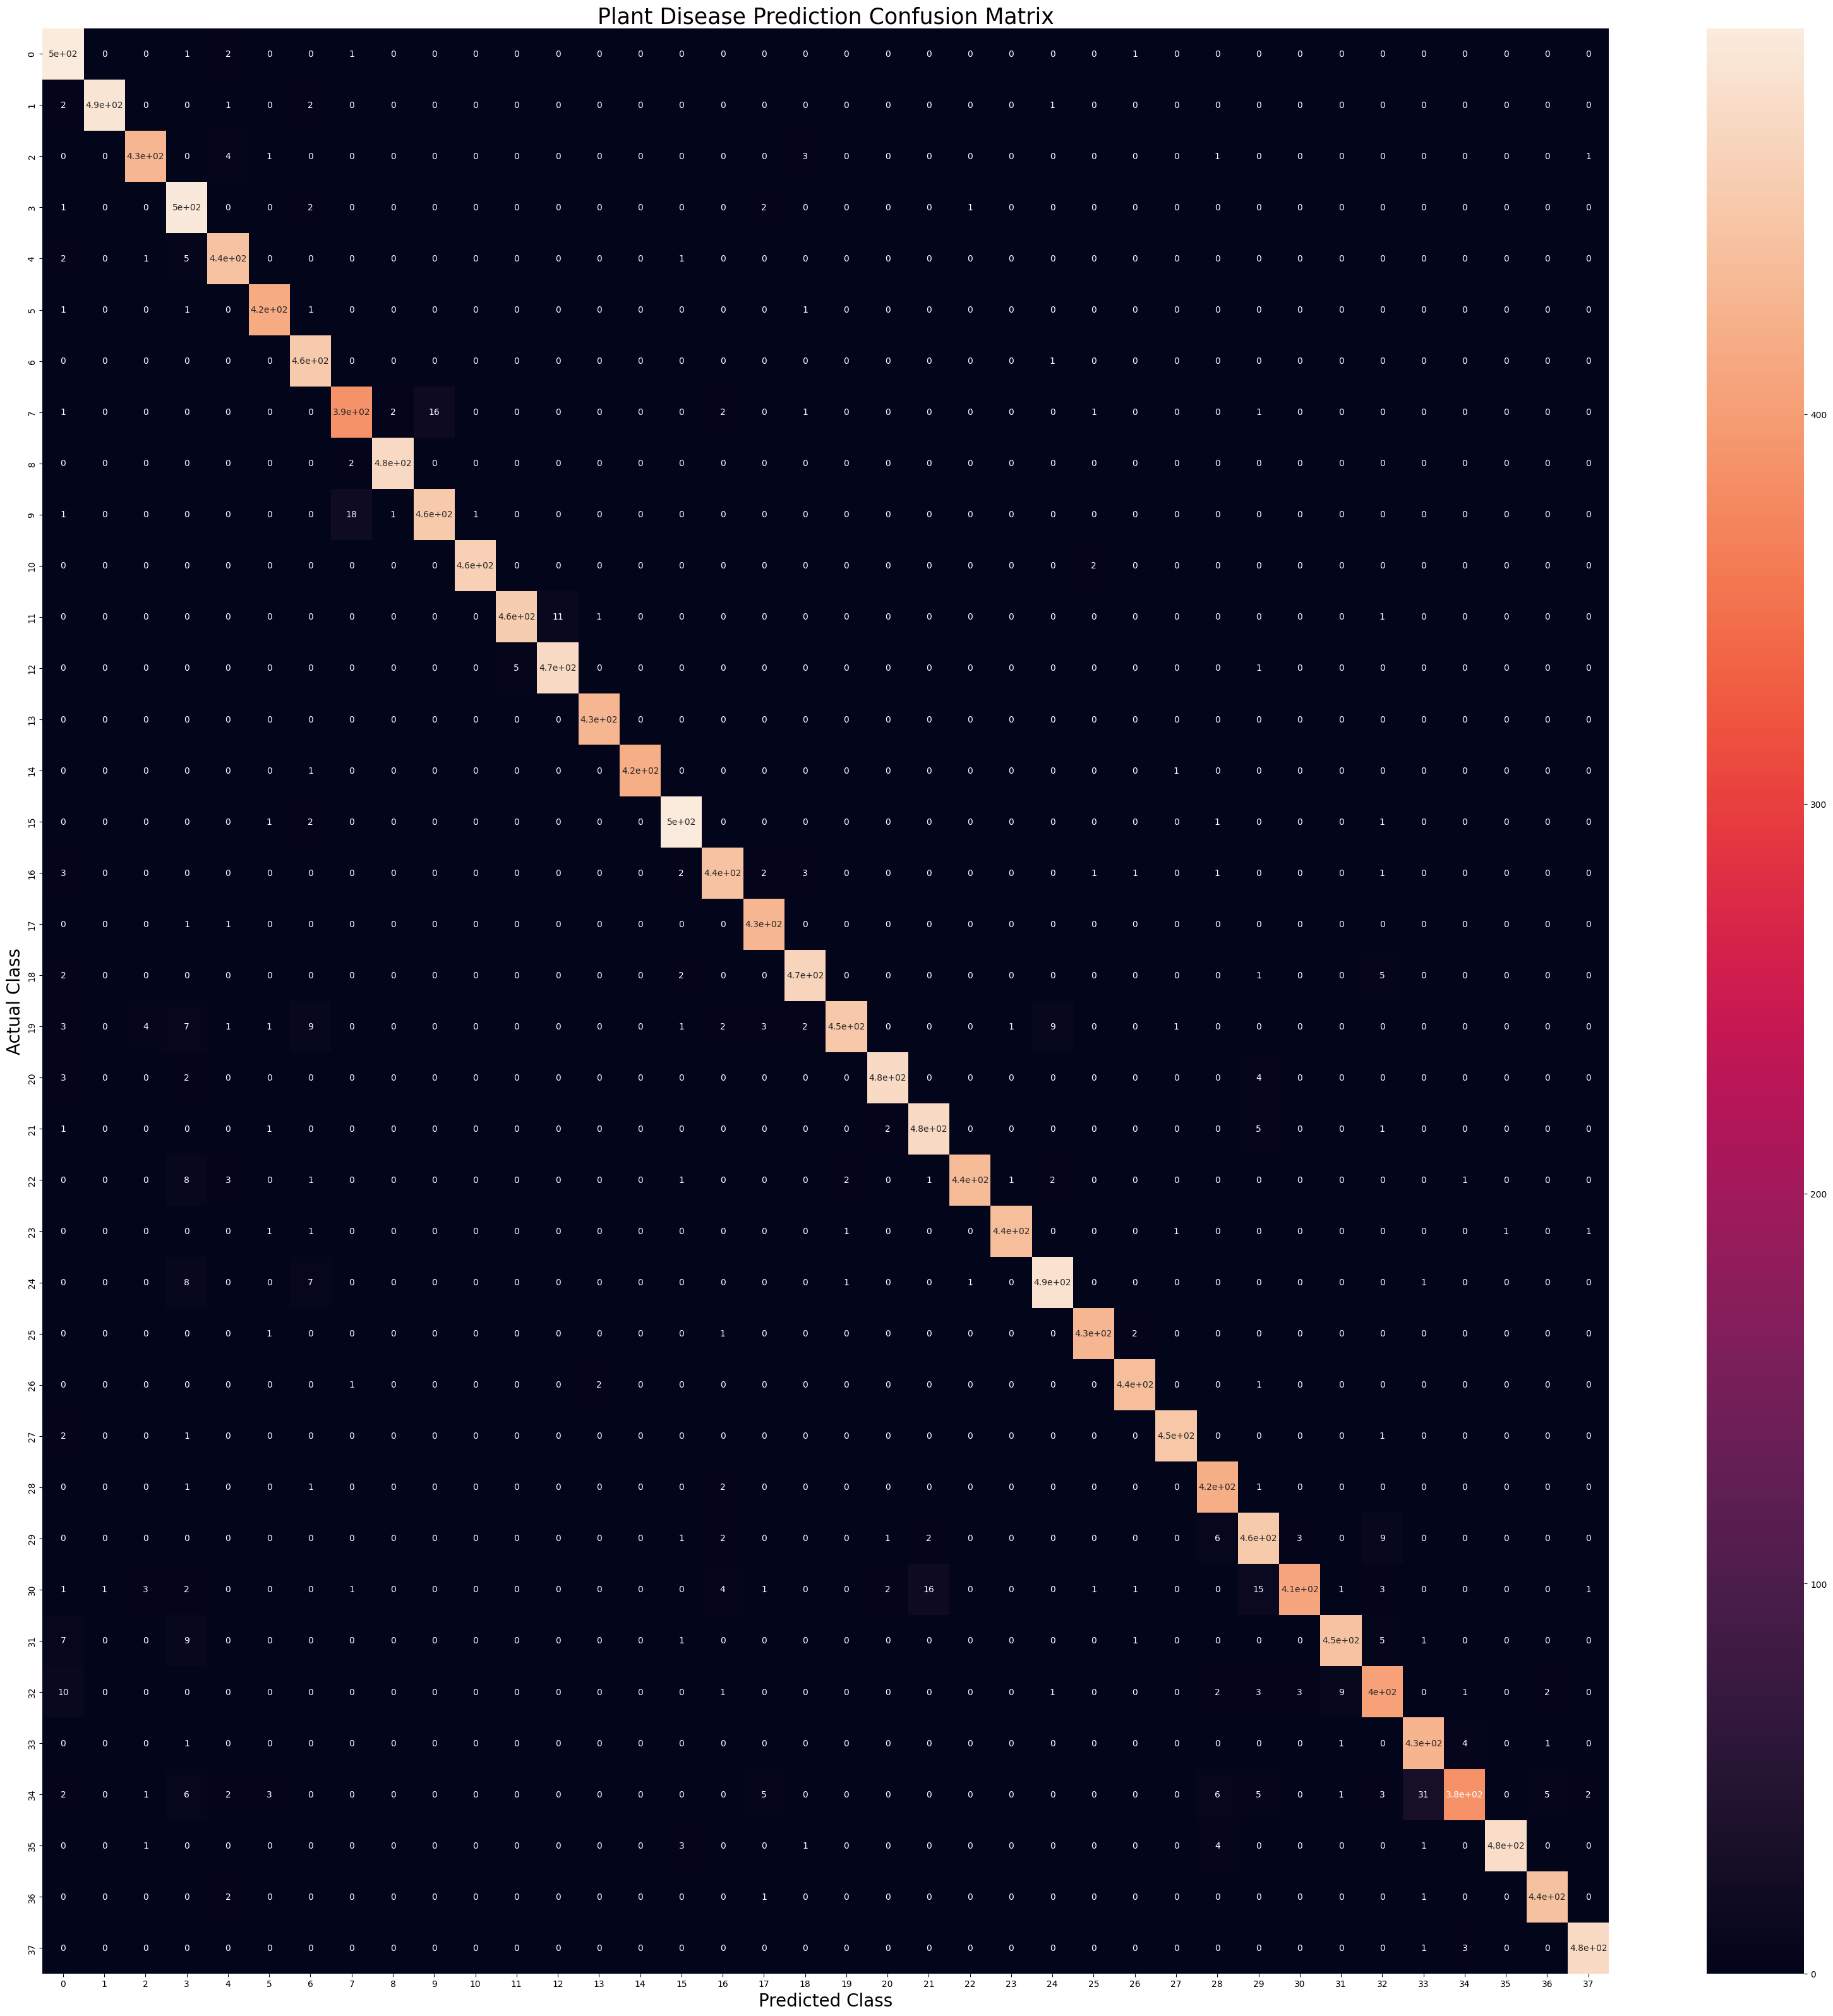

In [42]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()